# The Sparks Foundation - GRIP

# Data Science and Business Analytics

# Task 5 - Exploratory Data Analysis on IPL Dataset

## Author - Walid Hossain

# importing libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# importing the dataset

In [2]:
data_matches = pd.read_csv('matches.csv')

data_matches.shape



(756, 18)

As we can see, the dataset has 756 rows and 18 columns in it

# Understanding the data

In [3]:
data_matches.head()                    

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
data_deliveries = pd.read_csv('deliveries.csv')

data_deliveries.shape



(179078, 21)

In [5]:
data_deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


### Team with the biggest win across all IPL seasons

In [6]:
biggest_win=data_matches['win_by_runs'].max()
team_biggest_win=[]

In [7]:
data_matches.loc[data_matches['win_by_runs'] == biggest_win]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
43,44,2017,Delhi,2017-05-06,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan,NaN


In [8]:
f = data_matches.loc[data_matches['win_by_runs']==biggest_win]

In [9]:
team_biggest_win.append((str(f['season'].tolist()[0])))
team_biggest_win.append((str(f['venue'].tolist()[0])))
team_biggest_win.append((str(f['team1'].tolist()[0])))
team_biggest_win.append((str(f['team2'].tolist()[0])))
team_biggest_win.append((str(f['winner'].tolist()[0])))

In [ ]:
#

In [10]:
team_biggest_win

['2017',
 'Feroz Shah Kotla',
 'Mumbai Indians',
 'Delhi Daredevils',
 'Mumbai Indians']

### Number of ties in the matches

In [11]:
data_matches['result']=='tie'
tie_matches_no = data_matches.loc[data_matches['result']=='tie']
tie_matches_no['result'].value_counts()

tie    9
Name: result, dtype: int64

#### Numbers of times DL methods have been used in IPL

In [21]:
f = data_matches.loc[data_matches['dl_applied']==1]
print('Total number of DL used throughtout the season:',f['dl_applied'].value_counts().sum())

Total number of DL used throughtout the season: 19


#### Number of times DL methods used throughout the seasons

In [13]:
f['season'].value_counts().sort_index()

2008    2
2009    3
2011    3
2014    1
2015    2
2016    4
2017    1
2018    3
Name: season, dtype: int64

# 7 Most Played Venue from 2008-2019

F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


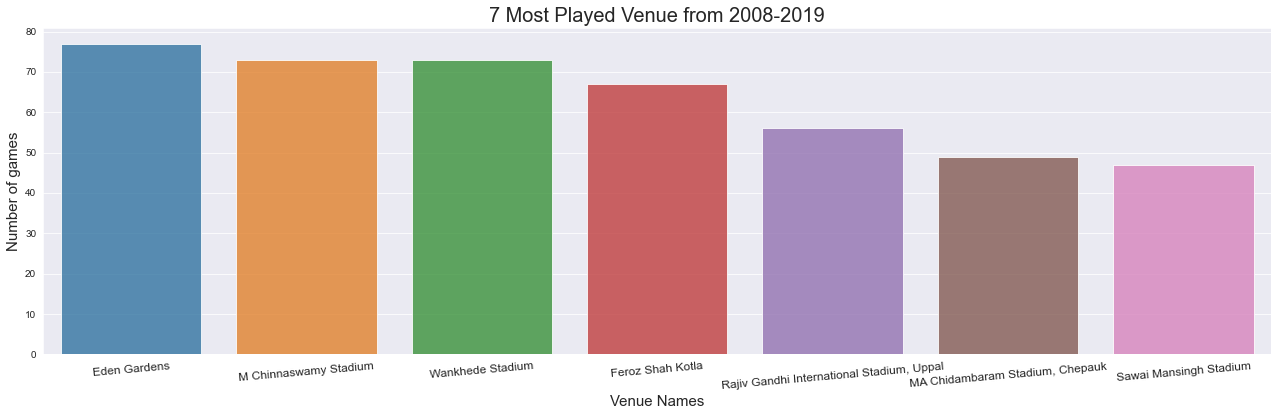

In [14]:
sns.set_style("darkgrid") #to make background with grid

ls=data_matches['venue'].value_counts().sort_values(ascending=False) #getting total number of matches played in a venue in descending order

ls=ls[:7] #taking first 7 values
plt.figure(figsize=(22,6))
Most_Played = sns.barplot(ls.index, ls.values, alpha=0.8) #plotting bar chart

plt.title("7 Most Played Venue from 2008-2019", fontsize =20)
plt.xlabel('Venue Names', fontsize =15)
plt.ylabel('Number of games', fontsize = 15)
Most_Played.set_xticklabels(rotation = 5,labels =ls.index, fontsize = 12)
plt.show()

# Total Wins by each team

F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


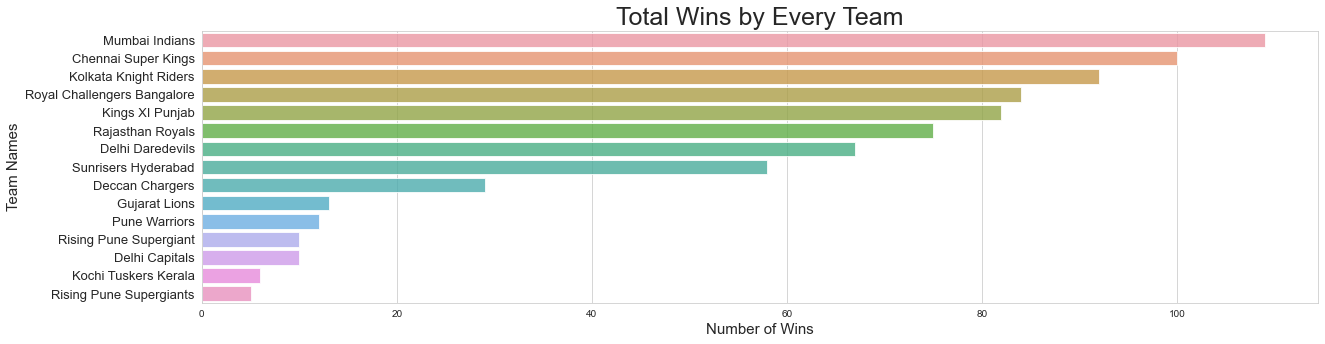

In [15]:
sns.set_style('whitegrid')
ls =data_matches['winner'].value_counts().sort_values(ascending = False)


plt.figure(figsize = (20,5))
sns.set_color_codes(palette="dark")
Total_Wins =sns.barplot(ls.values, ls.index, alpha = .8)

plt.title("Total Wins by Every Team", fontsize = 25)
plt.xlabel("Number of Wins",fontsize =15)
plt.ylabel("Team Names",fontsize =15)
Total_Wins.set_yticklabels(labels= ls.index, fontsize = 13)
plt.show()

From the graph, we can see that Mumbai Indians are the dominating team being the only team to have staggering number of wins over 100.

# Most Player of the Match

F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


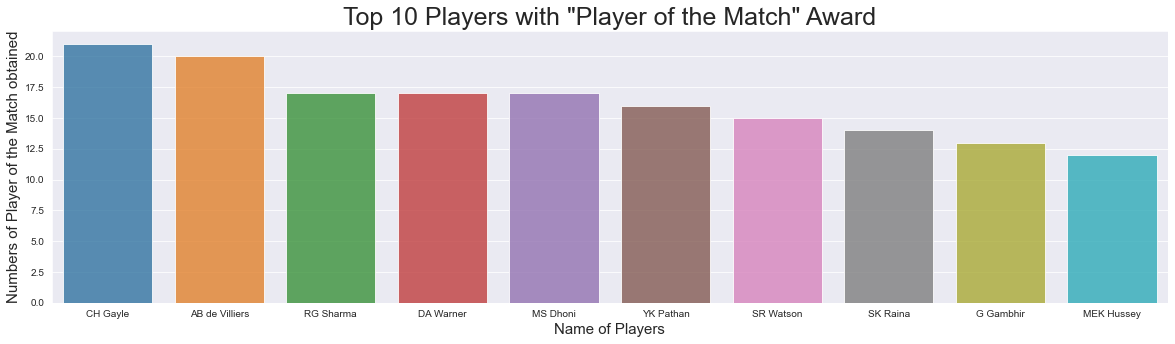

In [16]:
sns.set_style('darkgrid')

ls =data_matches['player_of_match'].value_counts().sort_values(ascending=False)
poms = data_matches['player_of_match'].value_counts(ascending = False)
ls = ls[:10]
plt.figure(figsize=(20,5))
Total_pom=sns.barplot(ls.index, ls.values, alpha = .8)

plt.title('Top 10 Players with "Player of the Match" Award', fontsize = 25)
plt.xlabel("Name of Players",fontsize =15)
plt.ylabel("Numbers of Player of the Match obtained",fontsize =15)
Total_pom.set_xticklabels(labels= ls.index, fontsize = 10)

plt.show()


Most "Player of the Match" Award has been won by CH Gayle with followed by a slight difference by AB de Villiers in the 2nd spot

# Numbers of games hosted in each city

In [17]:
data_matches.at[data_matches['city']=='Bengaluru','city']='Bangalore'

F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


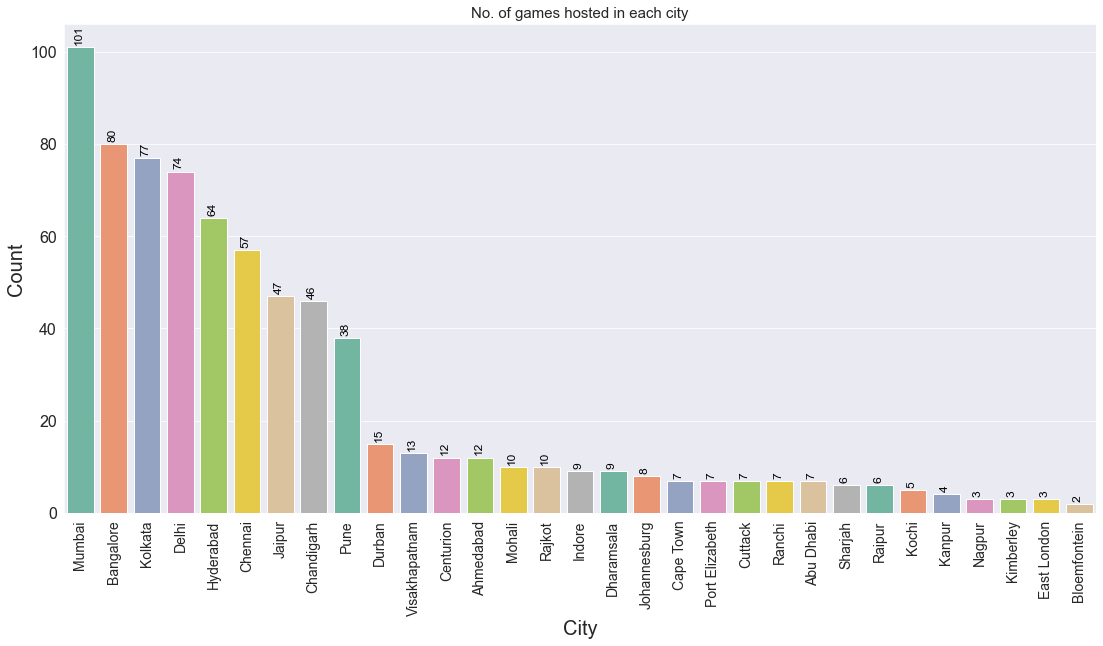

In [18]:
fig=plt.gcf()
fig.set_size_inches(18.5,9)
sns.countplot(data_matches['city'],order=data_matches['city'].value_counts().index,palette='Set2')
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=16)
plt.xlabel('City',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.title('No. of games hosted in each city',fontsize=15)
count=0 
cities=pd.DataFrame(data_matches['city'].value_counts())
cities['name']=data_matches['city'].value_counts().index
for i in cities['city']:
    plt.text(count-.2,i+1,str(i),rotation=90,color='black',size=12)
    count+=1
plt.show()

Mumbai is the city with most number in terms of hosting IPL games

# Top 5 team with most Toss wins

F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


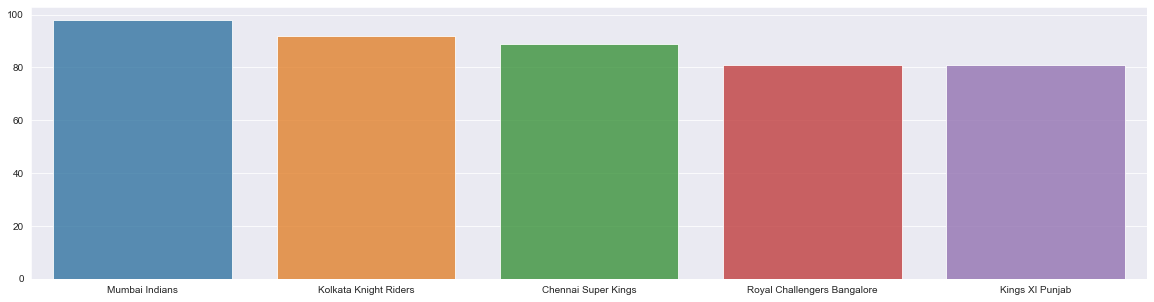

In [19]:
sns.set_style('darkgrid')
ls = data_matches['toss_winner'].value_counts().sort_values(ascending = False)
ls = ls[:5]
plt.figure(figsize=(20,5))
tosses = sns.barplot(ls.index, ls.values, alpha = 0.8)
plt.show()

The most tosses won throughout the season was by the team "Mumbai Indians" followed by Kolkata Knight Riders and so on...